In [1]:
import warnings
warnings.filterwarnings('ignore')

from preamble import *
plt.rcParams['image.cmap'] = "gray"
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [2]:
from preamble import *

# 데이터 표현과 특성 공학
# 범주형 변수
# 원-핫-인코딩 (가변수)

In [3]:
import os
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# "names" 매개변수로 열 이름을 제공합니다
data = pd.read_csv("../../data/adult.data", 
                   header=None, 
                   index_col=False,
                   names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
                          'marital-status', 'occupation', 'relationship', 'race', 'gender',
                          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income'])
# 예제를 위해 몇개의 열만 선택합니다
data = data[['age', 'workclass', 'education', 
             'gender', 'hours-per-week','occupation','income']]
# IPython.display 함수는 주피터 노트북을 위해 포맷팅된 출력을 만듭니다
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


# 문자열로 된 범주형 데이터 확인하기

In [4]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [5]:
print("원본 특성:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

In [6]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,...,0,0,1,0
1,50,13,0,0,...,0,0,1,0
2,38,40,0,0,...,0,0,1,0
3,53,40,0,0,...,0,0,1,0
4,28,40,0,0,...,0,0,1,0


In [7]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# NumPy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


# 숫자로 표현된 범주형 특성

In [9]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 만듭니다
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1],
                        '범주형 특성': ['양말', '여우', '양말', '상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [10]:
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [11]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


# scikit-learn에서 범주형 변수 다루기: OneHotEncoder와 ColumnTransformer

In [12]:
# 4-2 OneHotEncoder 와 ColumnsTransformer: Sklearn으로 범주형 변수 다루기
# OneHotEncoder는 모든 열에 인코딩을 수행한다.(문자열, 정수 다 변환)

from sklearn.preprocessing import OneHotEncoder
# sparse=False로 설정하면 OneHotEncode가 희소 행렬이 아니라 넘파이 배열을 반환합니다
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [13]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


In [14]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([("scaling", StandardScaler(), ['age', 'hours-per-week']),
                        ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [16]:
ct

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('scaling',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['age', 'hours-per-week']),
                                ('onehot',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=False),
                                 ['workclass', 'education', 'gender',
                                  'occupation'])],
                  verbose=False)

In [17]:
# 선형 모델 만들기
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# income을 제외한 모든 열을 추출합니다
data_features = data.drop("income", axis=1)
# 데이터프레임과 income을 분할합니다
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)
# 44개의 특성이 생성됨 + 연속형 특성 스케일이 조정됨

(24420, 44)


In [18]:
logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

# 데이터 스케일이 성능 향상에 영향을 미치지 못했다.

테스트 점수: 0.81


In [19]:
ct.named_transformers_.onehot

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

# make_column_transformer를 사용하여 ColumnTransformer 생성하기

In [20]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation']))

# 구간 분할, 이산화 그리고 선형 모델, 트리 모델

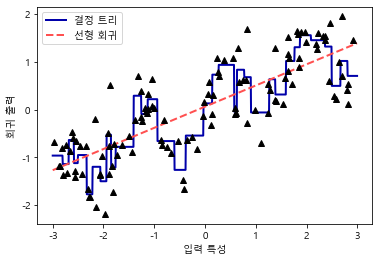

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 
                   3, 
                   1000, 
                   endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, 
         reg.predict(line), # 트리 라인
         label="결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line,           
         reg.predict(line),  # 선형 직선
         '--', 
         label="선형 회귀")

plt.plot(X[:, 0], # 산점도
         y, 
         '^', 
         c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

# 선형과 결정트리가 같은 예측을 만들어 그래프가 완전히 겹쳐진다.
# 용량이 크고 고차원 데이터셋이고 선형 모델을 사용해야 한다면 구간 분할이 모델
# 성능을 높이는 방법이 될 수 있을 것이다.

In [22]:
from sklearn.preprocessing import KBinsDiscretizer

In [23]:
# 연속형 데이터에 강력한 선형 모델을 만드는 방법으로 한 특성을 여러 특성으로 나누는
# 구간 분할 bining이 있다..
# bin_edges_ 에 특성별 경계값이 저장된다.

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.967, -2.378, -1.789, -1.2  , -0.612, -0.023,  0.566,  1.155,
        1.744,  2.333,  2.921])]


In [24]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [25]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [26]:
kb = KBinsDiscretizer(n_bins=10, 
                      strategy='uniform', 
                      encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5, 0, '입력 특성')

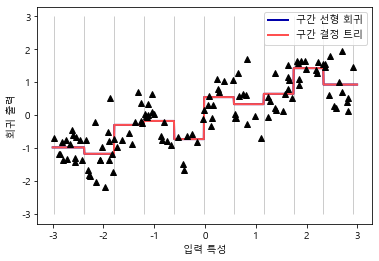

In [27]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, 
         reg.predict(line_binned), 
         label='구간 선형 회귀') # 결정트리 그래프랑 겹침.

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, 
         reg.predict(line_binned), 
         label='구간 결정 트리')  # 선형 회귀 그래프랑 겹침.

plt.plot(X[:, 0], 
         y, 
         '^', 
         c='k')
plt.vlines(kb.bin_edges_[0], # y축을 의미
           -3, 
           3, 
           linewidth=1, 
           alpha=.2)

plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

# 교차항과 고차항

In [28]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


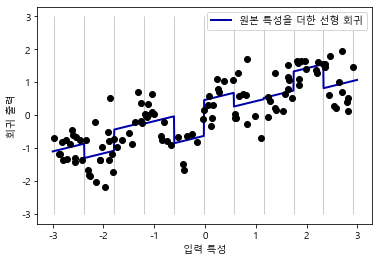

In [29]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, 
         reg.predict(line_combined), 
         label='원본 특성을 더한 선형 회귀') # 선형 회귀선

plt.vlines(kb.bin_edges_[0], # y축
           -3, 
           3, 
           linewidth=1, 
           alpha=.2)

plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0],  # 산점도
         y, 
         'o', 
         c='k')

# 모든 구간에서 같은 기울기를 가지고 있음.

In [30]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


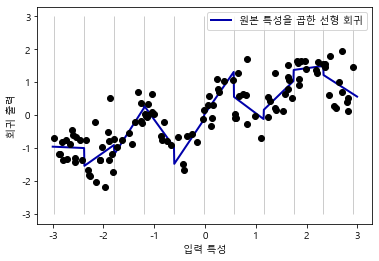

In [31]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, 
         reg.predict(line_product), 
         label='원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0], 
           -3, 
           3, 
           linewidth=1, 
           alpha=.2)

plt.plot(X[:, 0], 
         y, 
         'o', 
         c='k')

plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best") 

In [32]:
# 원본 특성의 다항식 추가하기
from sklearn.preprocessing import PolynomialFeatures

# x ** 10까지 고차항을 추가합니다
# 기본값인 "include_bias=True"는 절편에 해당하는 1인 특성을 추가합니다
poly = PolynomialFeatures(degree=10, 
                          include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [33]:
print("X_poly.shape:", X_poly.shape)

X_poly.shape: (120, 10)


In [34]:
print("X 원소:\n", X[:5])
print("X_poly 원소:\n", X_poly[:5])

X 원소:
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
X_poly 원소:
 [[   -0.753     0.567    -0.427     0.321    -0.242     0.182    -0.137
      0.103    -0.078     0.058]
 [    2.704     7.313    19.777    53.482   144.632   391.125  1057.714
   2860.36   7735.232 20918.278]
 [    1.392     1.938     2.697     3.754     5.226     7.274    10.125
     14.094    19.618    27.307]
 [    0.592     0.35      0.207     0.123     0.073     0.043     0.025
      0.015     0.009     0.005]
 [   -2.064     4.26     -8.791    18.144   -37.448    77.289  -159.516
    329.222  -679.478  1402.367]]


In [35]:
print("항 이름:\n", poly.get_feature_names())

항 이름:
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


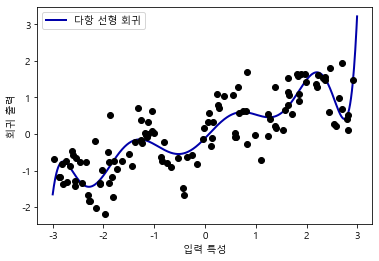

In [36]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)

plt.plot(line, 
         reg.predict(line_poly), 
         label='다항 선형 회귀')

plt.plot(X[:, 0], 
         y, 
         'o', 
         c='k')

plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

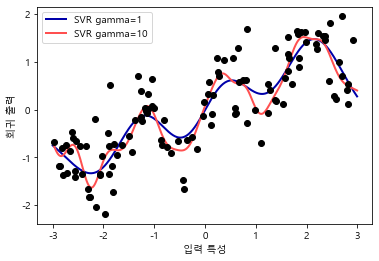

In [37]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, 
             svr.predict(line), 
             label=f'SVR gamma={gamma}')

plt.plot(X[:, 0], 
         y, 
         'o', 
         c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

In [38]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, 
                                                    boston.target,
                                                    random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
boston.data

array([[  0.006,  18.   ,   2.31 , ...,  15.3  , 396.9  ,   4.98 ],
       [  0.027,   0.   ,   7.07 , ...,  17.8  , 396.9  ,   9.14 ],
       [  0.027,   0.   ,   7.07 , ...,  17.8  , 392.83 ,   4.03 ],
       ...,
       [  0.061,   0.   ,  11.93 , ...,  21.   , 396.9  ,   5.64 ],
       [  0.11 ,   0.   ,  11.93 , ...,  21.   , 393.45 ,   6.48 ],
       [  0.047,   0.   ,  11.93 , ...,  21.   , 396.9  ,   7.88 ]])

In [40]:
# 폴리노미얼 피쳐 적용-다항식 적용.
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("X_train.shape:", X_train.shape)
print("X_train_poly.shape:", X_train_poly.shape)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [41]:
print("다항 특성 이름:\n", poly.get_feature_names())

다항 특성 이름:
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [42]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

# 특성을 추가했을때 성능 향상

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


In [43]:
# 랜덤 포레스트를 사용해 성능 비교

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

# 특성을 추가했을 때 오히려 정확도 감소

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.774


### 특성을 추가했을 때 랜덤 포레스트는 오히려 정확도 감소
### 하지만 제곱항이나 세제곱 항을 추가하면 회귀모델에는 도움이 되는 것 같다.

# 단변량 비선형 변환

In [44]:
# 4-6 일변량 비선형 변환
# 대부분의 모델은 각 특성이 정규본포와 비슷할 대 최고의 성능을 낸다.
# 포아송 분포를 이용하여 치우친 모델 만들기

rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [45]:
print("특성 출현 횟수:\n", np.bincount(X[:, 0]))

특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


In [46]:
np.bincount(X[:,0])

array([28, 38, 68, 48, 61, 59, 45, 56, 37, 40, 35, 34, 36, 26, 23, 26, 27,
       21, 23, 23, 18, 21, 10,  9, 17,  9,  7, 14, 12,  7,  3,  8,  4,  5,
        5,  3,  4,  2,  4,  1,  1,  3,  2,  5,  3,  8,  2,  5,  2,  1,  2,
        3,  3,  2,  2,  3,  3,  0,  1,  2,  1,  0,  0,  3,  1,  0,  0,  0,
        1,  3,  0,  1,  0,  2,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  2,
        2,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1], dtype=int64)

Text(0.5, 0, '값')

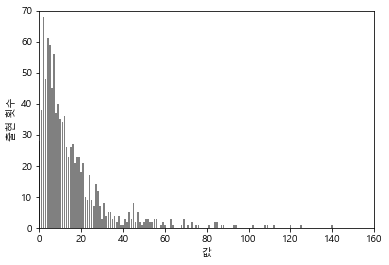

In [47]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [48]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score))
score

테스트 점수: 0.622


0.6224186236310756

In [49]:
# 로그함수를 적용해 정규분포 형태로 만들기
X_train_log = np.log(X_train + 1) # '0'이되면 '-'무한대로 빠지므로 +1을 해준다.
X_test_log = np.log(X_test + 1)

Text(0.5, 0, '값')

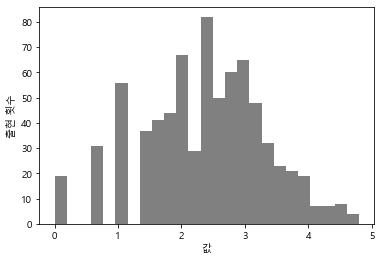

In [50]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [51]:
# 정확도 재측정 -> 정확도가 크게 향상됨.
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score))
score

테스트 점수: 0.875


0.8749342372887815

# 4-8 특성 공학 - 전문가 지식 활용

# CitiBike 자료 활용

In [52]:
# 4-8 전문가 지식 활용
import mglearn
citibike=mglearn.datasets.load_citibike()
citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

Text(0, 0.5, '대여횟수')

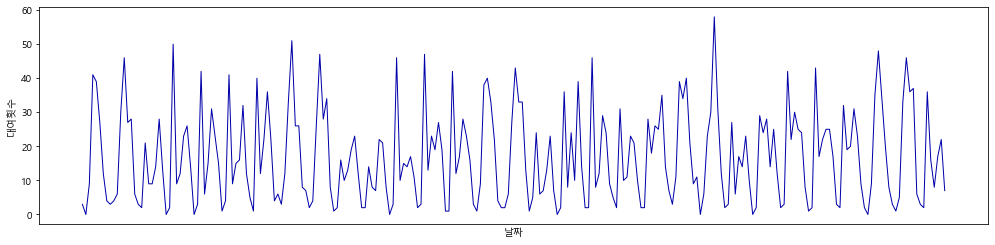

In [53]:
plt.figure(figsize=(17,4))
xticks = pd.date_range(start=citibike.index.min(), 
                       end=citibike.index.max(),
                      freq='D')
week=["일","월","화","수","목","금","토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"),
                                               xticks.strftime("%m-%d"))]
plt.xticks(xticks.astype(int),
           xticks_name, 
           rotation=90, 
           ha="left")

plt.plot(citibike, 
         linewidth=1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

In [54]:
# 타깃값 추출(대여 횟수)
y=citibike.values
print(y)
# POSIX 시간을 10**9로 나누어 변경
X=citibike.index.astype("int64").values.reshape(-1,1) // 10**9
print(citibike.index)

[ 3  0  9 41 39 27 12  4  3  4  6 30 46 27 28  6  3  2 21  9  9 14 28 13
  0  2 50  9 12 23 26 14  0  3 42  6 15 31 23 15  1  4 41  9 15 16 32 12
  5  1 40 12 22 36 22  4  6  3 12 33 51 26 26  8  7  2  4 26 47 28 34  8
  1  2 16 10 13 19 23 12  2  2 14  8  7 22 21  8  0  3 46 10 15 14 17 11
  2  3 47 13 23 19 27 19  1  1 42 12 17 28 23 16  3  1  9 38 40 33 22  4
  2  2  6 27 43 33 33 13  1  5 24  6  7 13 23  7  0  2 36  8 24 10 39 14
  2  2 46  8 12 29 24  9  5  2 31 10 11 23 21 10  2  2 28 18 26 25 35 14
  7  3 11 39 34 40 21  9 11  0  6 23 30 58 31 12  2  3 27  6 17 14 23 10
  0  2 29 24 28 14 25 12  2  3 42 22 30 25 24  8  1  2 43 17 22 25 25 17
  3  2 32 19 20 31 23  9  2  0  9 35 48 34 20  8  3  1  5 33 46 36 37  6
  3  2 36 16  8 17 22  7]
DatetimeIndex(['2015-08-01 00:00:00', '2015-08-01 03:00:00',
               '2015-08-01 06:00:00', '2015-08-01 09:00:00',
               '2015-08-01 12:00:00', '2015-08-01 15:00:00',
               '2015-08-01 18:00:00', '2015-08-01 21:00:00',


In [55]:
# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용합니다.
n_train = 184
def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:] # 훈련 세트 & 테스트 세트로
    y_train, y_test = target[:n_train], target[n_train:] # 타겟
    
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test,y_test)))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(17,4))
    
    plt.xticks(range(0, len(X), 8), 
               xticks_name, 
               rotation=90, 
               ha="left")
    
    plt.plot(range(n_train), # 1.plot
             y_train, 
             label="훈련")
    
    plt.plot(range(n_train, len(y_test)+n_train),  # 2.plot
             y_test, 
             '--', 
             label='테스트')
    
    plt.plot(range(n_train), # 3.plot
             y_pred_train, 
             '--',
             label="훈련 예측")
    
    plt.plot(range(n_train, len(y_test)+n_train), # 4.plot
             y_pred, 
             '--',
             label='테스트 예측')
    
    plt.legend(loc="best")

테스트 세트 R^2: -0.04


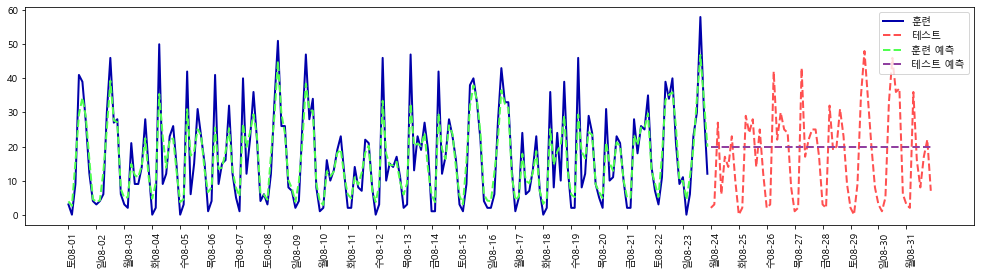

In [56]:
regressor = RandomForestRegressor(n_estimators=100, 
                                  random_state=0)
eval_on_features(X, 
                 y, 
                 regressor)

테스트 세트 R^2: 0.60


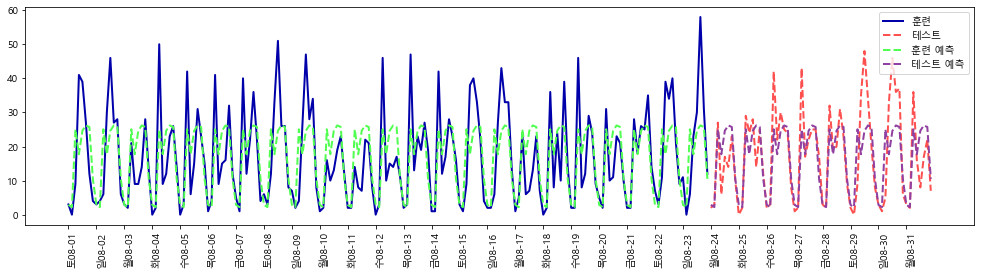

In [57]:
X_hour = citibike.index.hour.values.reshape(-1,1) # 시간 정보 넣어줌.
eval_on_features(X_hour, 
                 y, 
                 regressor)

테스트 세트 R^2: 0.84


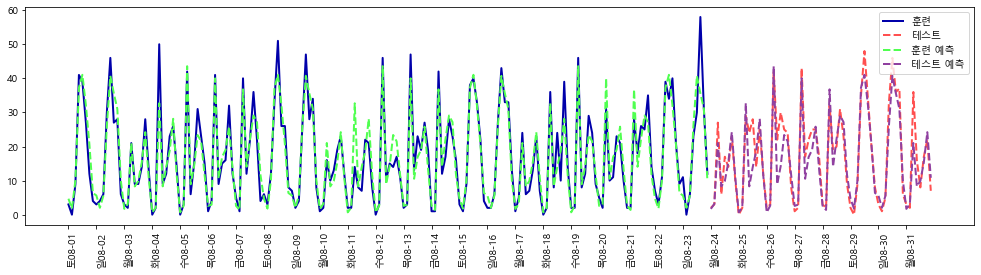

In [58]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1), # 주정보도 같이 넣어줌
                         citibike.index.hour.values.reshape(-1,1)])     # 시간 정보 넣어줌.
eval_on_features(X_hour_week,
                 y,
                 regressor)

테스트 세트 R^2: 0.13


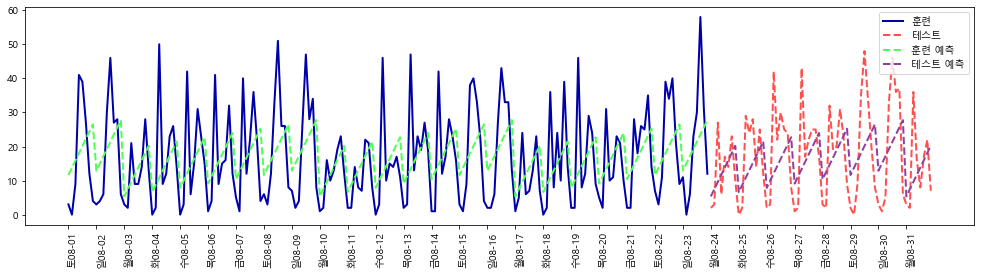

In [59]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, 
                 y, 
                 LinearRegression())

In [60]:
enc = OneHotEncoder(categories='auto')
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

테스트 세트 R^2: 0.62


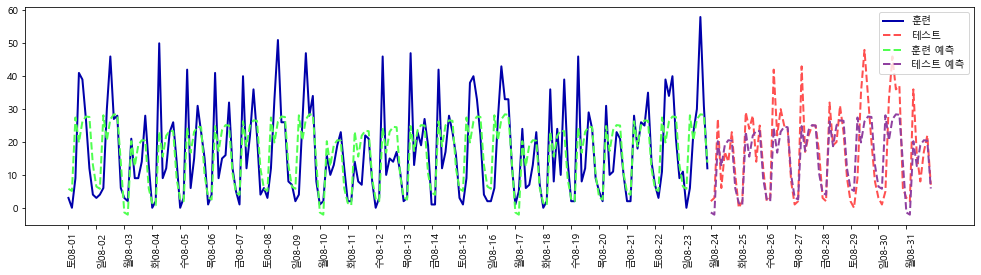

In [61]:
eval_on_features(X_hour_week_onehot, y, Ridge())

테스트 세트 R^2: 0.85


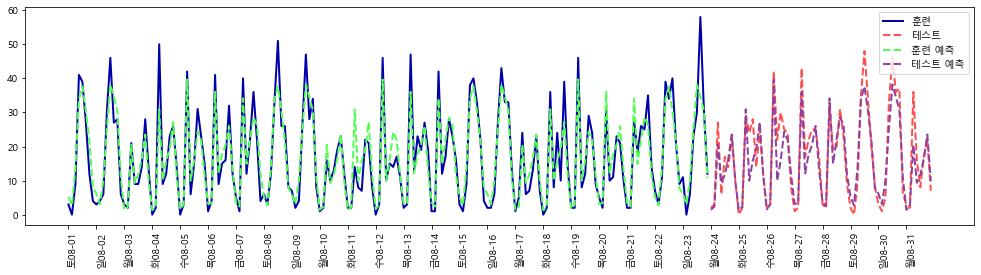

In [62]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [63]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월", "화", "수", "목", "금", "토", "일"]
features =  day + hour

In [64]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0] # '0'이 아닌것만 가져온다.

Text(0, 0.5, '계수 크기')

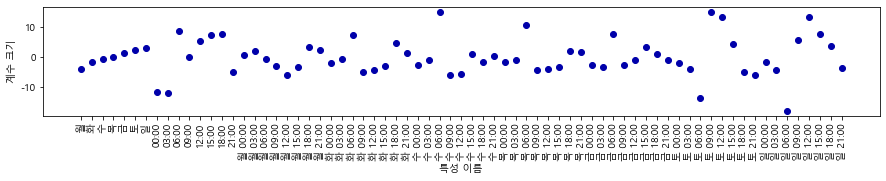

In [65]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")